In [1]:
# python program to read in Australian Tourist Bureau Aggregate Consumption Data for 2006-2007, 2017-2018

In [2]:
# resource libraries needed for data manipulation and visualization with plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st


In [3]:
# create file pointer for data file created from Austrailian Excel data
TourCons_fp = "./consumptiondata_aus.csv"

In [4]:
# create file pointer for air and water daily max temperature data from Davies Reef, right in the middle of the GBR
AirWaterTempMax_fp = "./DaviesReefAirWaterTempMax.csv"

In [5]:
# read in data and store in data frame
TourCons_df = pd.read_csv(TourCons_fp, encoding='ISO-8859-1')

In [6]:
# read in data and store in data frame
AirWaterTempMax_df = pd.read_csv(AirWaterTempMax_fp, encoding='ISO-8859-1')

In [7]:
# let's setup the x axis as  column names of the data frame 
x_axis = ['2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17','2017-18']

In [8]:
# create data series from the data frame columns
TNQ = TourCons_df['TNQ']
NSW = TourCons_df['NSW']
VIC = TourCons_df['VIC']
QNS = TourCons_df['QNS']

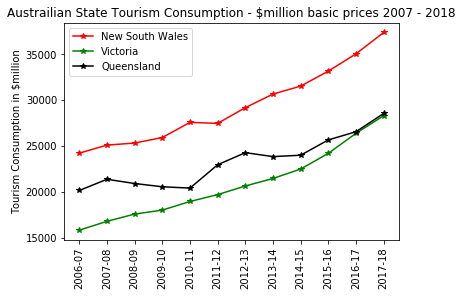

<Figure size 612x792 with 0 Axes>

In [9]:
# create handles for line plot for each australian state except tropical north queensland due to scale of spending
#TNQ_handle, = plt.plot(x_axis, TNQ, marker ='o', color='blue', label="Tropical North Queensland")
NSW_handle, = plt.plot(x_axis, NSW, marker ='*', color='red', label= "New South Wales")
VIC_handle, = plt.plot(x_axis, VIC, marker ='*', color='green', label= "Victoria")
QNS_handle, = plt.plot(x_axis, QNS, marker ='*', color='black', label="Queensland")
# set the text for the y axis
plt.ylabel("Tourism Consumption in $million")
# Set the title for the graph
plt.title("Austrailian State Tourism Consumption - $million basic prices 2007 - 2018")
# place the legend in the lower right
plt.legend(loc="best")
# rotate the labels
plt.xticks(rotation=90)
# save tbe plot to the current folder
plt.savefig("./Aus_state_totalconsmptn.png")
# set the figure size to 8.5 x 11
plt.figure(figsize=[8.5,11])
# show the plot
plt.show()

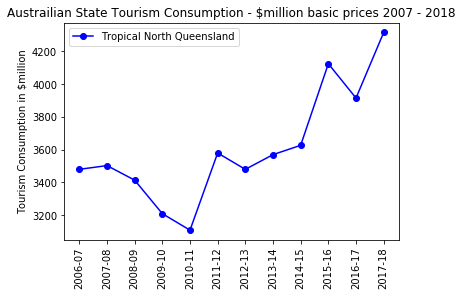

<Figure size 612x792 with 0 Axes>

In [10]:
# create and plot Tropical North Queensland
TNQ_handle, = plt.plot(x_axis, TNQ, marker ='o', color='blue', label="Tropical North Queensland")
# set the text for the y axis
plt.ylabel("Tourism Consumption in $million")
# Set the title for the graph
plt.title("Austrailian State Tourism Consumption - $million basic prices 2007 - 2018")
# place the legend in the lower right
plt.legend(loc="best")
# rotate the labels
plt.xticks(rotation=90)
# save the plot to the current folder
plt.savefig("./TropNorthQueenslnd_state_totalconsmptn.png")
# set the figure size to 8.5 x 11
plt.figure(figsize=[8.5,11])
# show the plot
plt.show()

In [11]:
# let's examine the temperature data, for ease of analysis, convert to Fahenheit to expand scale of y axis of temp, x axis is time period measured
# we'll need a new data frame to hold the values

In [12]:
AirWaterTempMax_Fht_df = pd.DataFrame()

In [13]:
# let's bring over the date column first as it's going to be the x axix data
AirWaterTempMax_Fht_df = AirWaterTempMax_df

In [14]:
# to get converted value, we're going to need to loop through the dates as we want a date, temp_f pair to graph
# Conversion formula is (Deg_C * (9/5)) + 32 = Deg_f  
# For Deg_C = 0, this evaluates to 0 * (9/5) + 32 = Deg_F which equals 32 = Deg_F

In [15]:


#dropping not available data
AirWaterTempMax_df = AirWaterTempMax_df.dropna(how = 'any')
#AirWaterTempMax_df.shape

In [16]:
# need to convert to astype int to get formula to work on entire data frame at once
conversion_factor = 0
conversion_factor = (9/5)
AirWaterTempMax_Fht_df['AirTempMax_Fht'] = AirWaterTempMax_Fht_df['AirTempMax'] * conversion_factor + 32
AirWaterTempMax_Fht_df['WaterTempMax_Fht'] = AirWaterTempMax_Fht_df['WaterTempMax'] * conversion_factor + 32


In [17]:
x_axis = AirWaterTempMax_Fht_df['date']

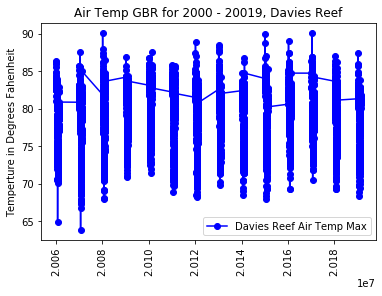

<Figure size 612x792 with 0 Axes>

In [18]:
Temp_Fah_handle, = plt.plot(x_axis, AirWaterTempMax_Fht_df['AirTempMax_Fht'], marker ='o', color='blue', label="Davies Reef Air Temp Max")
# set the text for the y axis
plt.ylabel("Temperture in Degrees Fahenheit")
# Set the title for the graph
plt.title("Air Temp GBR for 2000 - 20019, Davies Reef")
# place the legend in the lower right
plt.legend(loc="best")
# rotate the labels
plt.xticks(rotation=90)
# save the plot to a file in the current folder
plt.savefig("./DaviesReef_AirTempMax.png")
# set the figure size to 8.5 x 11
plt.figure(figsize=[8.5,11])
# show the plot
plt.show()

In [19]:
# Let's look at a subset of the data, for the timer period 20150101 to the end of the data set
AirWaterTempMax_Fht_subset_df = pd.DataFrame()

In [20]:
AirWaterTempMax_Fht_subset_df = AirWaterTempMax_Fht_df

In [21]:
AirWaterTempMax_Fht_subset_df = AirWaterTempMax_Fht_subset_df.loc[(AirWaterTempMax_Fht_subset_df['date'] >= 20160101) & (AirWaterTempMax_Fht_subset_df['date'] <= 20191231)]

In [22]:
x_axis = AirWaterTempMax_Fht_subset_df['date']

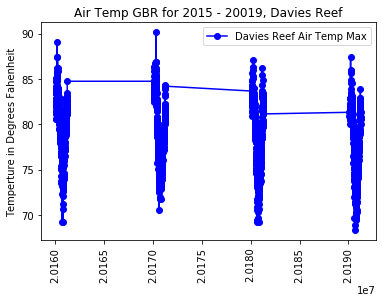

<Figure size 612x792 with 0 Axes>

In [23]:
AirTemp_Fah_handle, = plt.plot(x_axis, AirWaterTempMax_Fht_subset_df['AirTempMax_Fht'], marker ='o', color='blue', label="Davies Reef Air Temp Max")
# set the text for the y axis
plt.ylabel("Temperture in Degrees Fahenheit")
# Set the title for the graph
plt.title("Air Temp GBR for 2015 - 20019, Davies Reef")
# place the legend in the lower right
plt.legend(loc="best")
# rotate the labels
plt.xticks(rotation=90)
# save the plot to a file in the current folder
plt.savefig("./DaviesReef_AirTempMax_2015_2019.png")
# set the figure size to 8.5 x 11
plt.figure(figsize=[8.5,11])
# show the plot
plt.show()

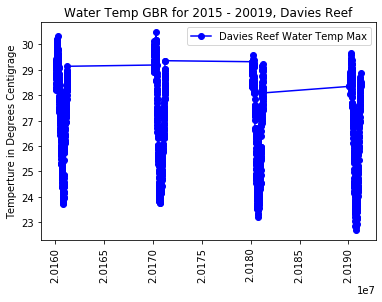

<Figure size 612x792 with 0 Axes>

In [24]:
# let's look at the max water temp, corals need temp between 18 and 29 C for good health
WaterTemp_handle, = plt.plot(x_axis, AirWaterTempMax_Fht_subset_df['WaterTempMax'], marker ='o', color='blue', label="Davies Reef Water Temp Max")
# set the text for the y axis
plt.ylabel("Temperture in Degrees Centigrage")
# Set the title for the graph
plt.title("Water Temp GBR for 2015 - 20019, Davies Reef")
# place the legend in the lower right
plt.legend(loc="best")
# rotate the labels
plt.xticks(rotation=90)
# save the plot to a file in the current folder
plt.savefig("./DaviesReef_WaterTempMax_2015_2019.png")
# set the figure size to 8.5 x 11
plt.figure(figsize=[8.5,11])
# show the plot
plt.show()